In [1]:
##http://www.feerc.ru/uisem/portal/ad/services/getData.php?d=now&t=chelyabinsk

In [2]:
!pip install seaborn
!pip install h3
!pip install folium
!pip install shapely
!pip install griddata
!pip3 install scipy
!pip3 install ffmpeg
!apt install imagemagick -y
!pip install wand

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common
  libijs-0.35 libilmbase12 libjbig2dec0 liblqr-1-0 libltdl7
  libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra libmagickwand-6.q16-3
  libnetpbm10 libopenexr22 libpaper-utils libpaper1 libwmf0.2-7 netpbm
  poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript ffmpeg gimp gnuplot grads graphviz groff-base hp2xx html2ps
  libwmf-bin mplayer povray radiance sane-utils texlive-base-bin transfig
  ufraw-batch xdg-utils libfftw3-bin libfftw3-dev inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafon

In [3]:
!pip install urllib2


ERROR: Could not find a version that satisfies the requirement urllib2 (from versions: none)
ERROR: No matching distribution found for urllib2


In [4]:
import matplotlib.pyplot as plt

In [5]:
import pathlib
import pandas as pd
import numpy as np
import os

import h3

In [6]:
import json
import requests


In [7]:
response = requests.get('http://www.feerc.ru/uisem/portal/ad/services/getData.php?d=now&t=chelyabinsk')
todos = json.loads(response.text)

In [8]:
data_GPS_C=pd.DataFrame()
for i in range(len(todos['data'][1]['stations'])):
    data_s=todos['data'][1]['stations'][i]
    data_GPS_C = data_GPS_C.append({'name': data_s['label'],'longitude': data_s['lng'],'latitude': data_s['lat'],'val':data_s['si'][4]['val']}, ignore_index=True)


In [9]:
'''for i in range(len(todos['data'][2]['stations'])):
    data_s=todos['data'][2]['stations'][i]
    data_GPS_C = data_GPS_C.append({'name': data_s['label'],'longitude': data_s['lng'],'latitude': data_s['lat'],'val':data_s['si'][4]['val']}, ignore_index=True)
'''

"for i in range(len(todos['data'][2]['stations'])):\n    data_s=todos['data'][2]['stations'][i]\n    data_GPS_C = data_GPS_C.append({'name': data_s['label'],'longitude': data_s['lng'],'latitude': data_s['lat'],'val':data_s['si'][4]['val']}, ignore_index=True)\n"

In [10]:
data_GPS_C=data_GPS_C.set_index(['name'])
data_GPS_C

,latitude,longitude,val
name,,,
"Челябинск(ТСН), №1, ул.Мамина д.19б",55.176092,61.482534,0.1
"Челябинск(ТСН), №2, пр.Победы д.287",55.186708,61.341622,0.0
"Челябинск(ТСН), №3, ул.5-ая Электровозная д.5",55.112454,61.424759,0.0
"Челябинск(ТСН), №4, ул.Зальцмана д.25а",55.165944,61.515656,0.2
"Челябинск(ТСН), №5, ул.Кузнецова д.51",55.110822,61.325788,0.1
"Челябинск(ТСН), №6, ул.Пирогова, д.1Г/1",55.124814,61.517859,0.2
"Челябинск(ТСН),№7, ул.Агаповская д.6/1",55.22677,61.409828,0.2
"Челябинск(ТСН), №8, ул.Шагольская кв.1 д.6В",55.23614,61.309119,0.1
"Челябинск(ТСН), №9, ул.Чичерина д.22",55.182619,61.288414,0.0


In [11]:
#MSK=[[37.376684908203096,55.7957880895471],[37.364325289062464,55.7315234841734],[37.39453769140622,55.697412346005066],[37.40827060156247,55.68267328730198],[37.453589205078075,55.636869056546395],[37.4989078085937,55.594899347399334],[37.596411470703096,55.57156334252638],[37.69116855078122,55.57234143382528],[37.817511324218714,55.631431083789636],[37.850470308593714,55.65084893483958],[37.833990816406214,55.69198281565908],[37.846350435546846,55.7082691348538],[37.85321689062496,55.763281945079946],[37.84909701757809,55.81821691873245],[37.7186343710937,55.896229854864345],[37.633490328124964,55.89854466574232],[37.58817172460933,55.91397319398547],[37.54285312109371,55.91243061851775],[37.474188570312464,55.88388185420568],[37.44946933203121,55.88388185420568],[37.411017183593714,55.87461826417799],[37.39453769140622,55.85222208945518],[37.40003085546871,55.83135882022269],[37.376684908203096,55.7957880895471]]

In [12]:
#for i in range(len(MSK)):
#    data_GPS_C = data_GPS_C.append({'longitude': MSK[i][0],'latitude': MSK[i][1],'NO2':data_GPS_C['NO2'].min()}, ignore_index=True)
#    print(MSK[i])

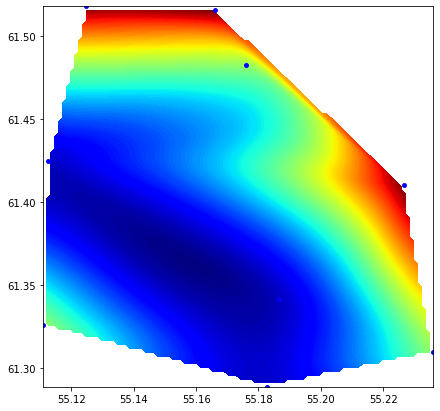

In [13]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

npts = 500

x=list(data_GPS_C['latitude'].values)
y=list(data_GPS_C['longitude'].values)
z=list(data_GPS_C['val'].values)


x = np.asarray(x, dtype='float64')
y = np.asarray(y, dtype='float64')

xi = np.linspace(min(x),max(x),100)
yi =  np.linspace(min(y),max(y),100)


zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
plt.figure(figsize=(7,7))

CS = plt.contourf(xi,yi,zi,200,cmap=plt.cm.jet)
plt.scatter(x,y,marker='o',c='b',s=15)
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
plt.show() 

In [14]:

df_h3 = pd.DataFrame(columns=['hex_id','NO2'])

for i in range(0,xi.shape[0]):
    for j in range(0,yi.shape[0]):
        df_h3 = df_h3.append({'hex_id': h3.geo_to_h3(xi[i],yi[j],  8),'val': zi[i,j]}, ignore_index=True)


In [15]:
from sklearn import preprocessing
df_h3['val'] = df_h3['val'] / df_h3['val'].max(axis=0)


In [16]:
df_h3=df_h3.drop_duplicates(subset=['hex_id'])

In [17]:
%%time
#Тепловая карта для СПб
import pandas as pd
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from shapely.geometry import Polygon
import matplotlib as mpl


import folium
V=[]
Heat=[]

#Создание карты
hmap = folium.Map(location=[55.0 ,61.23], zoom_start=12)



for i in df_h3.index: 

    polygon_geom = Polygon(h3.h3_to_geo_boundary(df_h3['hex_id'].loc[i], True)[:6])
    

    #fillColor=df_h3['value'].loc[i]
    #color=df_h3['value'].loc[i]
    
    fillColor= "#"+hex(int(plt.cm.jet(df_h3['val'].loc[i])[0]*255))[2:].zfill(2)+\
                   hex(int(plt.cm.jet(df_h3['val'].loc[i])[1]*255))[2:].zfill(2)+\
                   hex(int(plt.cm.jet(df_h3['val'].loc[i])[2]*255))[2:].zfill(2)
    color= fillColor
    
    folium.GeoJson(
        polygon_geom,
        style_function=lambda x,fillColor=fillColor, color=color: {
            "fillColor": fillColor,
            "color": "#000000",
            'weight' :0.3,
            'fillOpacity': 0.3 
        },
    ).add_to(hmap)
    
    
    
display(hmap)

CPU times: user 1.24 s, sys: 60.3 ms, total: 1.3 s
Wall time: 1.3 s


In [19]:
hmap.save('interpol.html')

In [21]:
50/4

12.5